#**Plant Disease Detection**



**importing Depedencies**

In [ ]:
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

**Uploading Dataset**

**Data set link:https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzipping the uploaded archive.zip file
zip_path = '/content/drive/My Drive/archive.zip'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/plantvillage-dataset')

In [ ]:
import os
print("Contents of '/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)':")
print(os.listdir('/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)'))
print("\nContents of '/content/plantvillage-dataset/new plant diseases dataset(augmented)':")
print(os.listdir('/content/plantvillage-dataset/new plant diseases dataset(augmented)'))
# Check contents of 'test'
print("\nContents of '/content/plantvillage-dataset/test':")
print(os.listdir('/content/plantvillage-dataset/test'))


Contents of '/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)':
['New Plant Diseases Dataset(Augmented)']

Contents of '/content/plantvillage-dataset/new plant diseases dataset(augmented)':
['New Plant Diseases Dataset(Augmented)']

Contents of '/content/plantvillage-dataset/test':
['test']


In [ ]:
import os

def find_image_folders(base_dir):
    image_extensions = ('.png', '.jpg', '.jpeg')
    folders_with_images = []

    for root, _, files in os.walk(base_dir):
        if any(file.lower().endswith(image_extensions) for file in files):
            folders_with_images.append(root)

    return folders_with_images

base_dir = '/content/plantvillage-dataset'
image_folders = find_image_folders(base_dir)

print("Folders containing image files:")
for folder in image_folders:
    print(folder)


Folders containing image files:
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___healthy
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Pepper,_bell___healthy
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab
/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Squash___Powdery_mildew
/content/plantvillage-datase

In [ ]:
import json
class_indices = train_gen.class_indices
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

print("Class indices saved to class_indices.json")

Class indices saved to class_indices.json


In [ ]:
import json
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
class_labels = list(class_indices.keys())
print("Class Labels:", class_labels)

Class Labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Toma

In [ ]:
df = '/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/images'


In [ ]:
df = '/content/plantvillage-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


**Displaying Random 9 images**

Number of images found: 70295


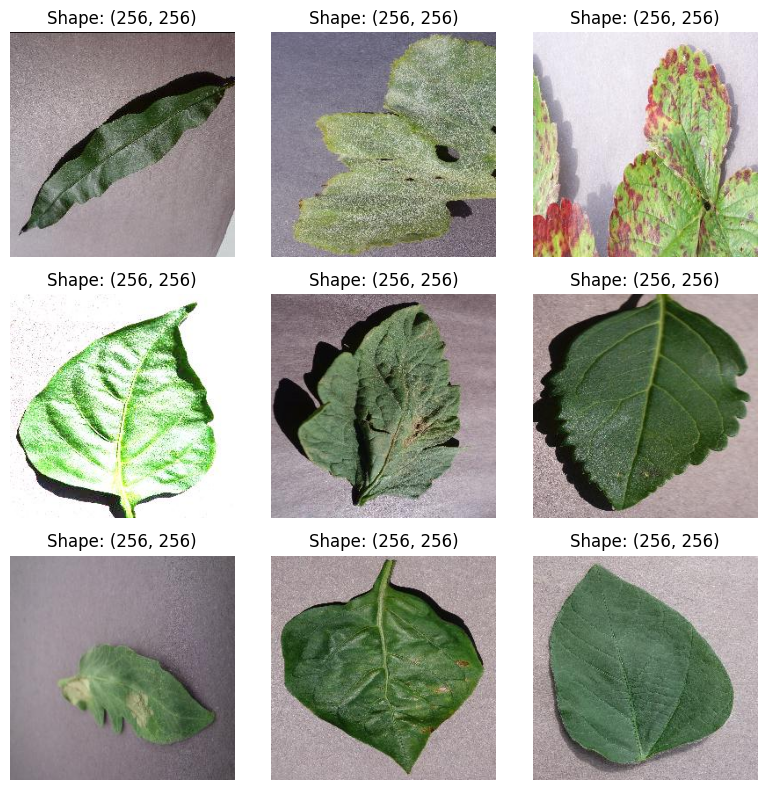

In [ ]:

image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(df) for f in filenames if f.lower().endswith(('png', 'jpg', 'jpeg'))]

print(f"Number of images found: {len(image_paths)}")

if len(image_paths) < 9:
    print("Not enough images for sampling. Showing all available images instead.")
    selected_paths = image_paths
else:
    selected_paths = random.sample(image_paths, 9)

plt.figure(figsize=(8, 8))
for i, path in enumerate(selected_paths):
    img = Image.open(path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Shape: {img.size}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

img_size = 224
batch_size = 32

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

 **Normalization**

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_gen = data_gen.flow_from_directory(
    df,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 56251 images belonging to 38 classes.


In [ ]:
validation_gen = data_gen.flow_from_directory(
    df,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 14044 images belonging to 38 classes.


In [ ]:

print(f"Training data batches: {len(train_gen)}")
print(f"Validation data batches: {len(validation_gen)}")

Training data batches: 1758
Validation data batches: 439


**Model building**

In [ ]:

from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')  # Output layer with number of classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,954,054 (45.60 MB)

 Trainable params: 11,954,054 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

**Training Model**

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




history = model.fit(
    train_gen,
    epochs=5,
    validation_data=validation_gen
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 3048s 2s/step - accuracy: 0.5614 - loss: 1.7136 - val_accuracy: 0.8589 - val_loss: 0.4723
Epoch 2/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 3083s 2s/step - accuracy: 0.8978 - loss: 0.3194 - val_accuracy: 0.8559 - val_loss: 0.4815
Epoch 3/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 3087s 2s/step - accuracy: 0.9559 - loss: 0.1373 - val_accuracy: 0.8604 - val_loss: 0.5246
Epoch 4/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 3146s 2s/step - accuracy: 0.9747 - loss: 0.0810 - val_accuracy: 0.8671 - val_loss: 0.5566
Epoch 5/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 3138s 2s/step - accuracy: 0.9784 - loss: 0.0659 - val_accuracy: 0.8656 - val_loss: 0.5975


In [ ]:
# Evaluate model performance
val_loss, val_accuracy = model.evaluate(validation_gen)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


439/439 ━━━━━━━━━━━━━━━━━━━━ 226s 512ms/step - accuracy: 0.8660 - loss: 0.5997
Validation Accuracy: 86.56%


**Visualization**

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

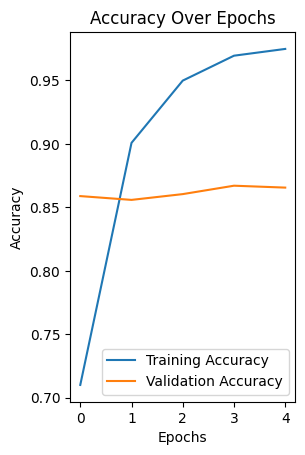

In [ ]:
# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

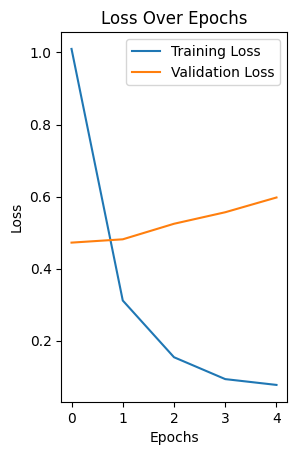

In [ ]:
# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:

predictions = model.predict(validation_gen, batch_size=batch_size)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_gen.classes

439/439 ━━━━━━━━━━━━━━━━━━━━ 232s 527ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(true_labels, predicted_labels, target_names=validation_gen.class_indices.keys())
print("Classification Report:\n", report)

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.01      0.01      0.01       403
                                 Apple___Black_rot       0.04      0.04      0.04       397
                          Apple___Cedar_apple_rust       0.01      0.01      0.01       352
                                   Apple___healthy       0.04      0.04      0.04       401
                               Blueberry___healthy       0.03      0.03      0.03       363
          Cherry_(including_sour)___Powdery_mildew       0.03      0.04      0.04       336
                 Cherry_(including_sour)___healthy       0.03      0.03      0.03       365
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       328
                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       381
               Corn_(maize)___Northern_Leaf_Blight     

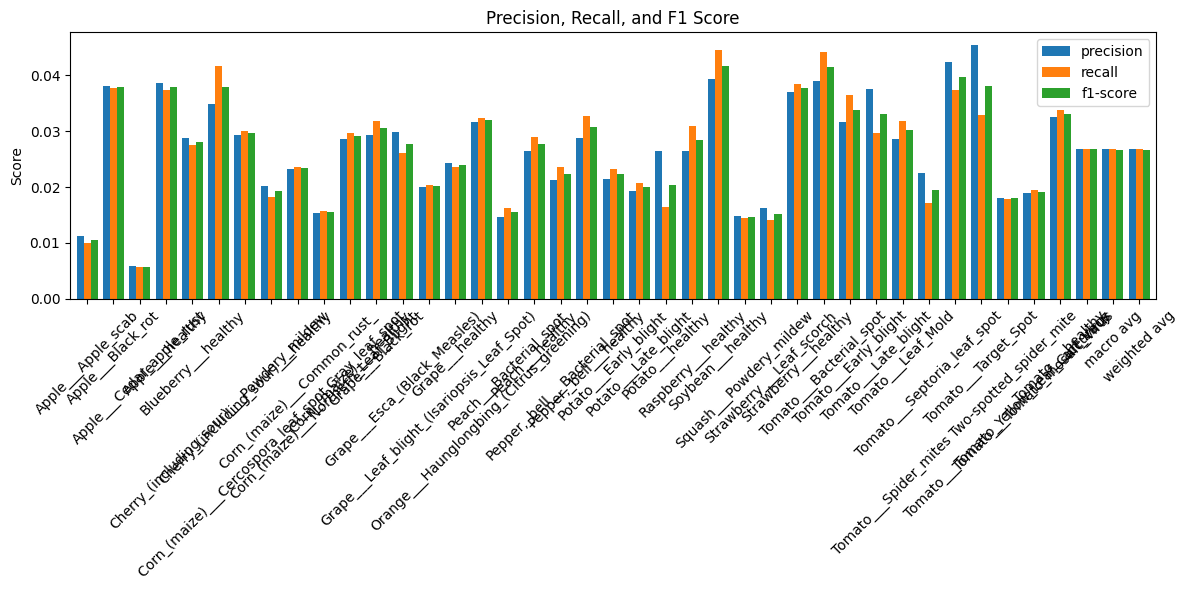

In [ ]:
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pickle

In [ ]:

with open('plant_disease_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:

with open('training_history.pkl', 'wb') as history_file:
    pickle.dump(history.history, history_file)